# Subspace Digital Twin, Sanity Checking Run (Deterministic)

*Danilo Lessa Bernardineli, November 2023*

On this notebook, we do an sanity checking run (which is a single run) so that basic metrics and KPIs
for the simulation are computed.

## Part 1. Dependences & Set-up

In [1]:
import logging

# Configure the logging level
logging.basicConfig(level=logging.WARNING) # DEBUG INFO WARNING ERROR CRITICAL

import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import panel as pn
pn.extension()
pn.state.clear_caches()

pio.renderers.default = "png" # For GitHub rendering

## Part 2. Simulation set-up & execution

In [2]:
from subspace_model.experiment import sanity_check_deterministic_run
sim_df = sanity_check_deterministic_run()


2023-12-05 00:11:15 - subspace-digital-twin - INFO
------------subspace-digital-twin------------
INFO:subspace-digital-twin:------------subspace-digital-twin------------


{'label': ['standard'], 'deterministic': [True], 'timestep_in_days': [1], 'issuance_function': [<function DEFAULT_ISSUANCE_FUNCTION at 0x7f0af53fa7a0>], 'slash_function': [<function DEFAULT_SLASH_FUNCTION at 0x7f0a9fa137f0>], 'block_time_in_seconds': [6], 'archival_depth': [100], 'archival_buffer_segment_size': [134217728], 'header_size': [6500], 'replication_factor': [10], 'max_block_size': [3932160], 'reward_proposer_share': [0.0], 'max_credit_supply': [3000000000], 'fund_tax_on_proposer_reward': [0.0], 'fund_tax_on_storage_fees': [0.1], 'compute_fees_to_farmers': [0.0], 'compute_fees_tax_to_operators': [0.05], 'slash_to_fund': [0.0], 'slash_to_holders': [0.05], 'operator_stake_per_ts_function': [<function <lambda> at 0x7f0a7f628c10>], 'nominator_stake_per_ts_function': [<function <lambda> at 0x7f0a7f628ca0>], 'transfer_farmer_to_holder_per_day': [0.05], 'transfer_operator_to_holder_per_day': [0.05], 'transfer_holder_to_nominator_per_day': [0.01], 'transfer_holder_to_operator_per_day

Initializing configurations:   0%|          | 0/1 [00:00<?, ?it/s]

Execution Method: local_simulations
Execution Mode: single_threaded


Flattening results:   0%|          | 0/9114 [00:00<?, ?it/s]

Total execution time: 0.53s


In [3]:
sim_df.head(5)

,days_passed,delta_days,delta_blocks,circulating_supply,user_supply,issued_supply,sum_of_stocks,block_utilization,dsf_relative_disbursal_per_day,reward_issuance_balance,...,compute_weight_per_bundle_function,min_compute_weights_per_bundle,transaction_size_function,min_transaction_size,bundle_size_function,min_bundle_size,transaction_count_per_day_function,bundle_count_per_day_function,slash_per_day_function,new_sectors_per_day_function
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.320000e+09,...,Lambda: (deterministic),2000000000,Lambda: (deterministic),100,Lambda: (deterministic),250,Lambda: (deterministic),Lambda: (deterministic),Lambda: (deterministic),Lambda: (deterministic)
13,1,1.0,14400.0,1.320000e+07,1.320000e+07,13200000.0,3.000000e+09,0.000002,0.0,1.306800e+09,...,Lambda: (deterministic),2000000000,Lambda: (deterministic),100,Lambda: (deterministic),250,Lambda: (deterministic),Lambda: (deterministic),Lambda: (deterministic),Lambda: (deterministic)
26,2,1.0,14400.0,2.626800e+07,2.626800e+07,26268000.0,3.000000e+09,0.000002,0.0,1.293732e+09,...,Lambda: (deterministic),2000000000,Lambda: (deterministic),100,Lambda: (deterministic),250,Lambda: (deterministic),Lambda: (deterministic),Lambda: (deterministic),Lambda: (deterministic)
39,3,1.0,14400.0,3.920518e+07,3.920531e+07,39205320.0,3.000000e+09,0.000002,0.0,1.280795e+09,...,Lambda: (deterministic),2000000000,Lambda: (deterministic),100,Lambda: (deterministic),250,Lambda: (deterministic),Lambda: (deterministic),Lambda: (deterministic),Lambda: (deterministic)
52,4,1.0,14400.0,5.201261e+07,5.201326e+07,52013266.8,3.000000e+09,0.000002,0.0,1.267987e+09,...,Lambda: (deterministic),2000000000,Lambda: (deterministic),100,Lambda: (deterministic),250,Lambda: (deterministic),Lambda: (deterministic),Lambda: (deterministic),Lambda: (deterministic)


In [4]:
sim_df.staking_pool_balance

0       0.000000e+00
13      0.000000e+00
26      3.456000e-08
39      1.319938e+02
52      6.448158e+02
            ...     
9061    1.550945e+09
9074    1.552031e+09
9087    1.553114e+09
9100    1.554194e+09
9113    1.555270e+09
Name: staking_pool_balance, Length: 702, dtype: float64

## Part 3. Visualizations

On this section, we'll visualize some base metrics on the simulations results

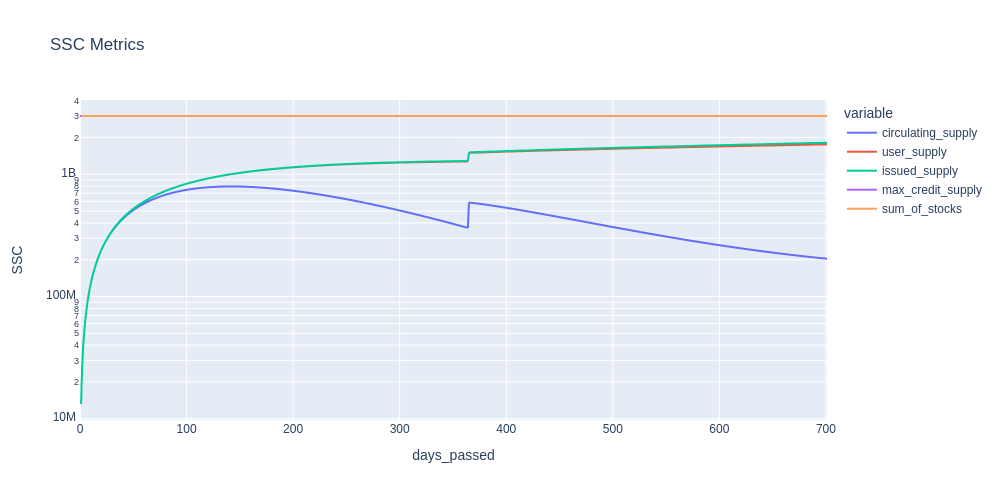

In [5]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "supply" in el] + ['sum_of_stocks'],
        title='SSC Metrics',
        labels={'value': 'SSC'},
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

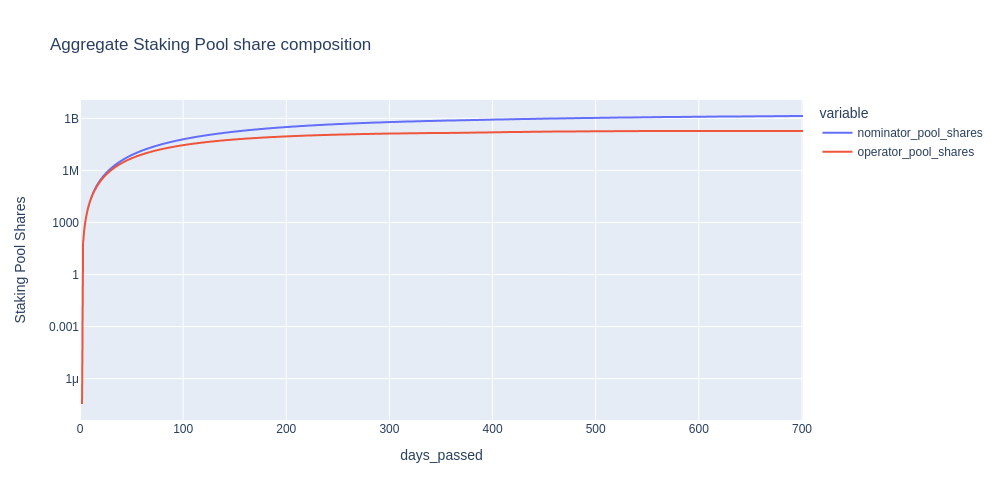

In [6]:
fig = px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "shares" in el],
        log_y=True,
        labels={'value': 'Staking Pool Shares'},
        title='Aggregate Staking Pool share composition'
        )
fig.update_layout(width=1000, height=500)
fig.show()

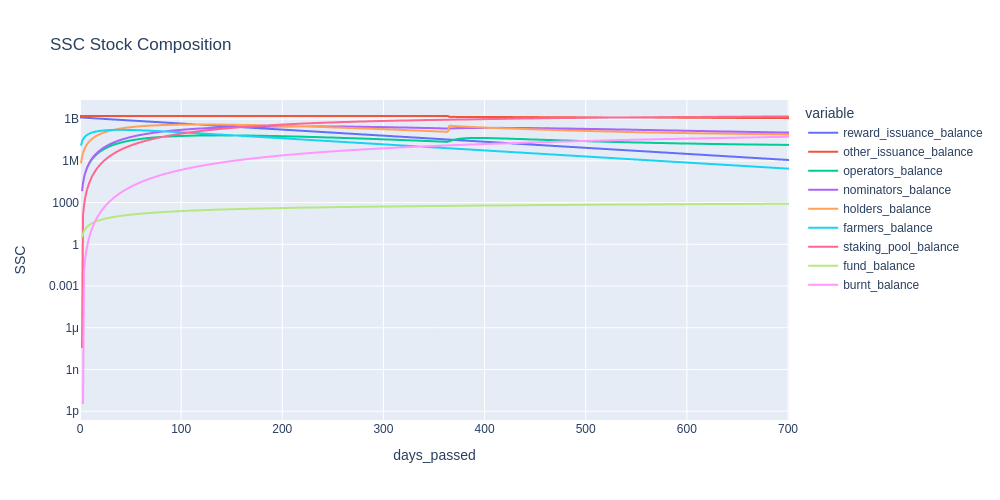

In [7]:
fig = px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "_balance" in el],
        title='SSC Stock Composition',
        labels={'value': 'SSC'},
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

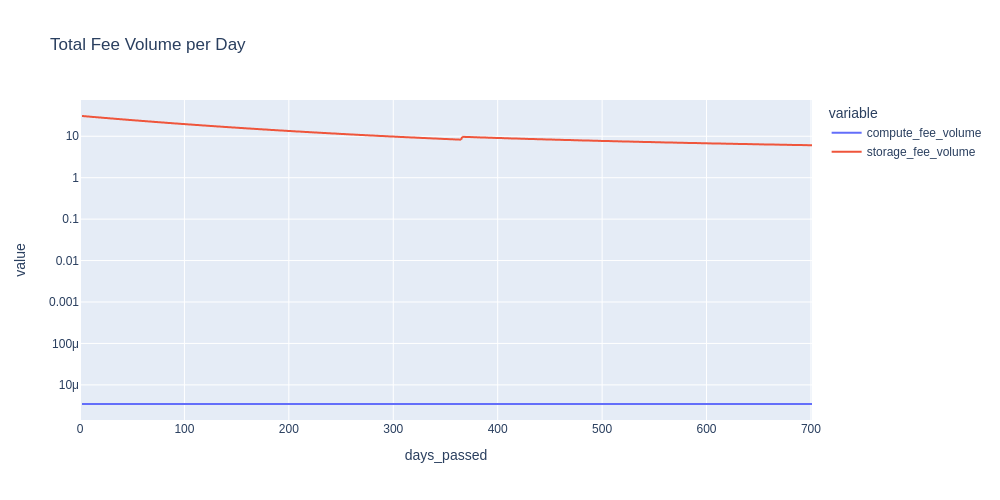

In [8]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "volume" in el],
        title='Total Fee Volume per Day',
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

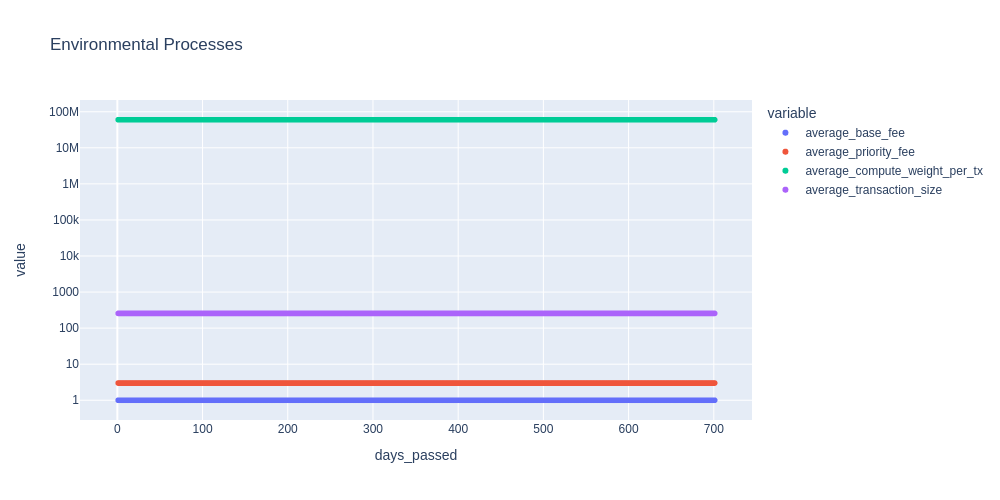

In [9]:
fig_df = sim_df.melt(id_vars=['days_passed'], value_vars=[el for el in sim_df.columns if "average" in el])


fig = px.scatter(fig_df, 
        x='days_passed', 
        y='value',
        color='variable',
        title='Environmental Processes',
        log_y=True)

fig.update_layout(width=1000, height=500)
fig.show()

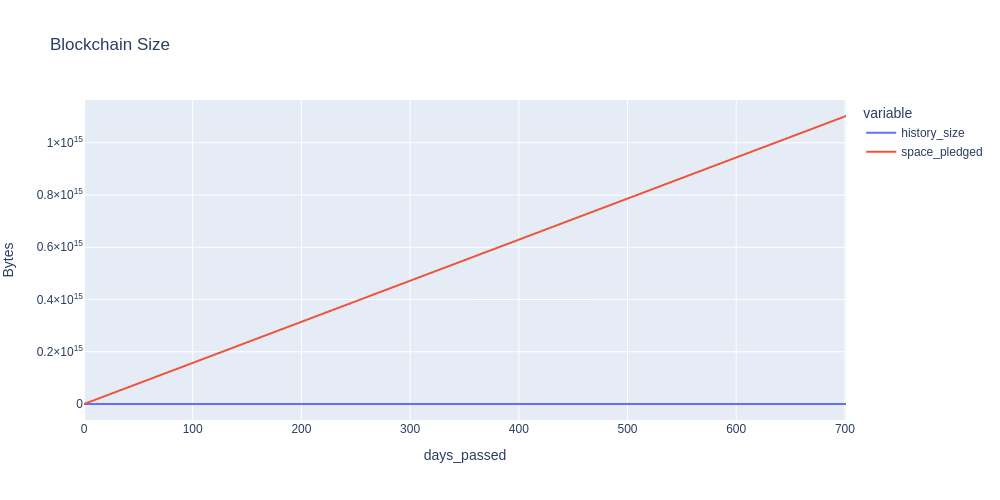

In [10]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=['history_size', 'space_pledged'],
        title='Blockchain Size',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.update_yaxes(matches=None, showticklabels=True)
fig.show()

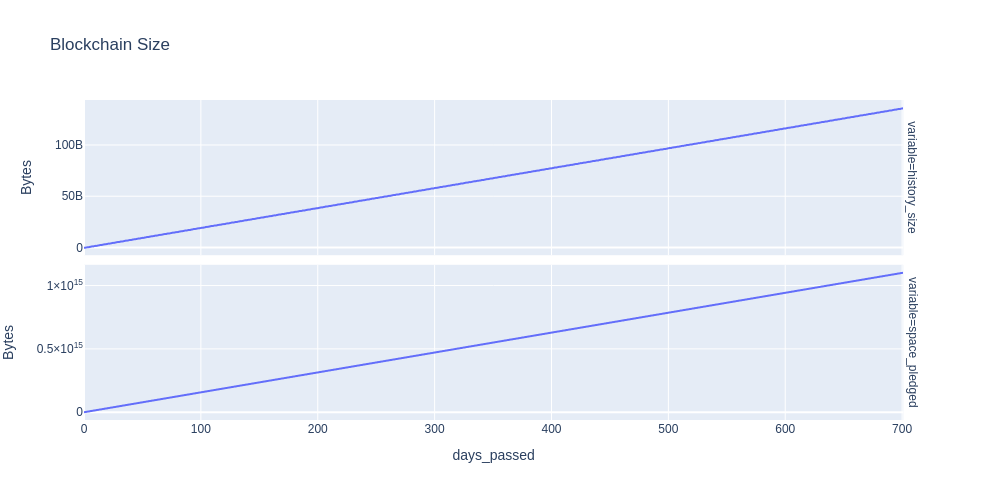

In [11]:
fig_df = sim_df.melt(id_vars=['days_passed'], 
                     value_vars=['history_size', 'space_pledged'])

fig = px.line(fig_df, 
        x='days_passed', 
        y='value',
        facet_row='variable',
        title='Blockchain Size',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.update_yaxes(matches=None, showticklabels=True)
fig.show()

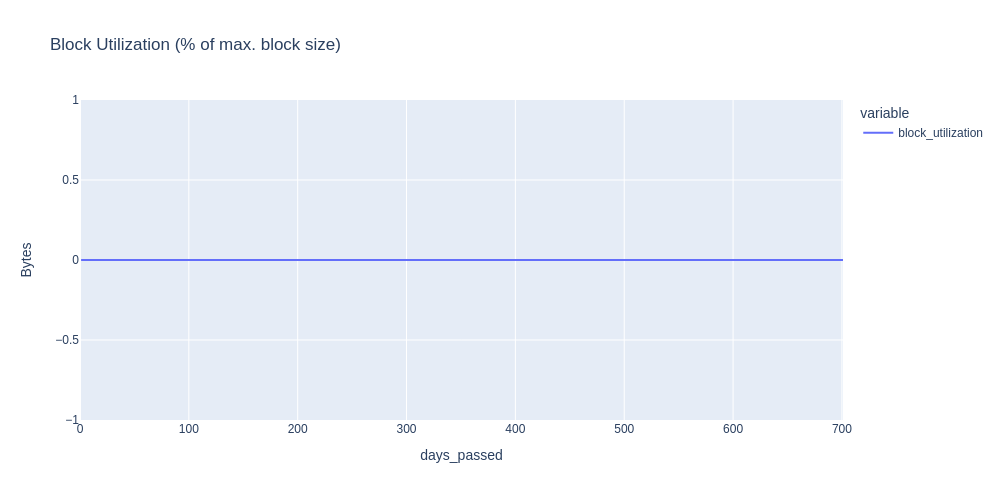

In [12]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=['block_utilization'],
        title='Block Utilization (% of max. block size)',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.show()

### Scoped KPIs

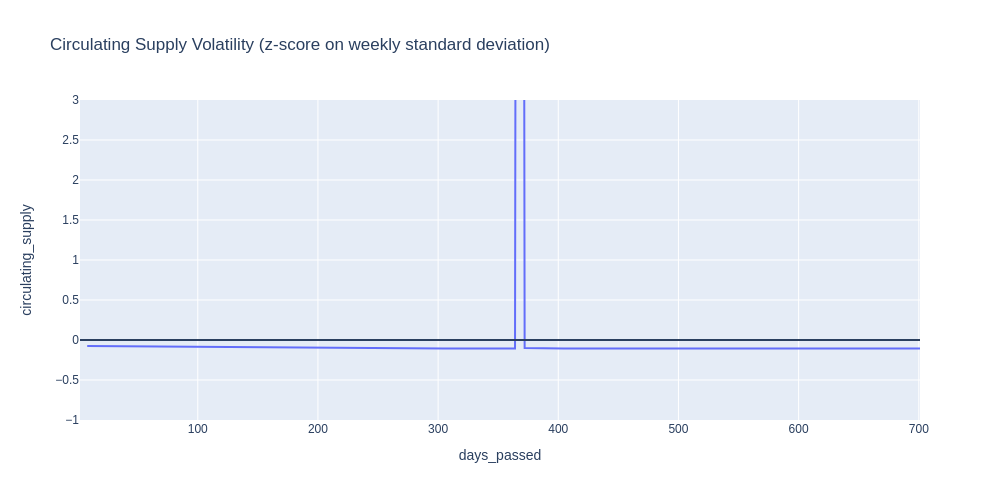

In [13]:
from subspace_model.trajectory_metrics import *
m_df = sim_df.set_index('days_passed')
s = window_volatility(m_df.circulating_supply.diff()).reset_index()

fig = px.line(s, 
        x='days_passed', 
        y='circulating_supply',
        title='Circulating Supply Volatility (z-score on weekly standard deviation)')
fig.add_hline(0)
fig.update_layout(width=1000, height=500, yaxis_range=[-1, 3])
fig.show()

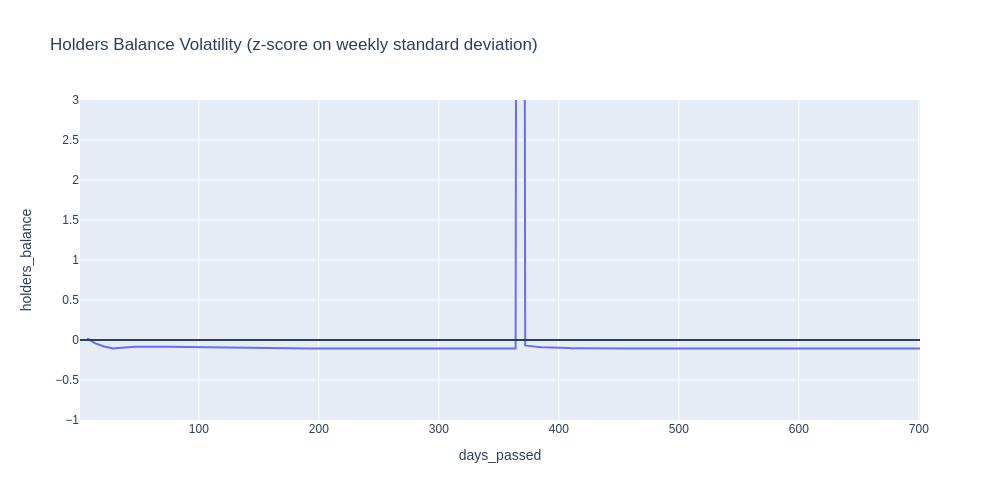

In [14]:
from subspace_model.trajectory_metrics import *
m_df = sim_df.set_index('days_passed')
s = window_volatility(m_df.holders_balance.diff()).reset_index()

fig = px.line(s, 
        x='days_passed', 
        y='holders_balance',
        title='Holders Balance Volatility (z-score on weekly standard deviation)')
fig.add_hline(0)
fig.update_layout(width=1000, height=500, yaxis_range=[-1, 3])
fig.show()

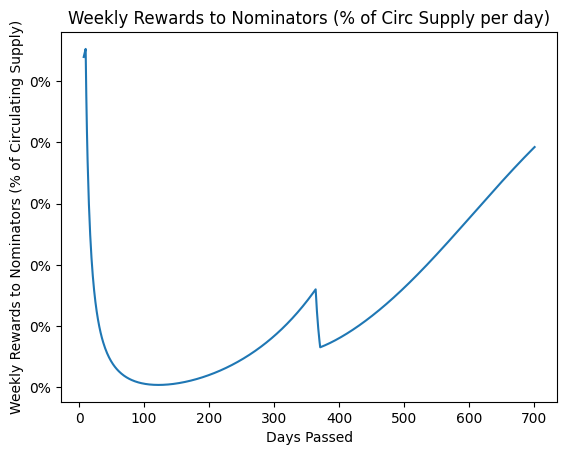

In [15]:
n_days = 7
fig_df = sim_df.set_index('days_passed')
s = fig_df.rewards_to_nominators.rolling(n_days).sum() / fig_df.circulating_supply.rolling(n_days).mean()
ax = s.plot()
plt.title("Weekly Rewards to Nominators (% of Circ Supply per day)")
plt.xlabel('Days Passed')
plt.ylabel('Weekly Rewards to Nominators (% of Circulating Supply)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.show()

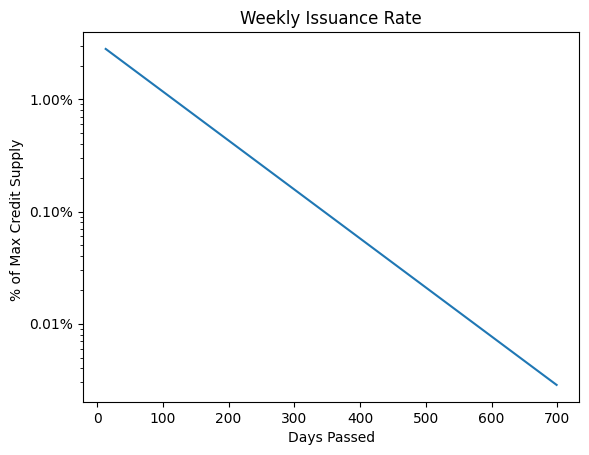

In [16]:
n = 7
s = fig_df.reward_issuance_balance.diff() * -1.0
s /= fig_df.max_credit_supply
s = s.rolling(n).sum()[n-1::n]

ax = s.plot(x='days_passed', y='reward_issuance_balance', logy=True)
plt.title("Weekly Issuance Rate")
plt.xlabel('Days Passed')
plt.ylabel('% of Max Credit Supply ')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
plt.show()

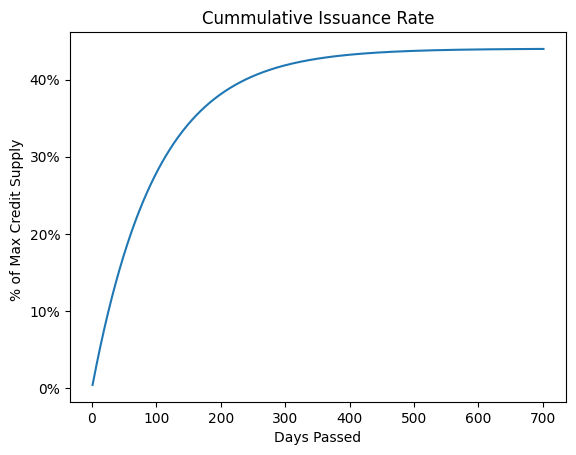

In [17]:
n = 7
s = fig_df.reward_issuance_balance.diff() * -1.0
s /= fig_df.max_credit_supply
s = s.cumsum()

ax = s.plot(x='days_passed', y='reward_issuance_balance')
plt.title("Cummulative Issuance Rate")
plt.xlabel('Days Passed')
plt.ylabel('% of Max Credit Supply ')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.show()